In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
#from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:\\data\\train'
valid_path = 'C:\\data\\test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
 # useful for getting number of output classes
folders = glob('C:\\data\\train\\*')

In [8]:
folders

['C:\\data\\train\\cats', 'C:\\data\\train\\dogs']

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\data\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 20000 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('C:\\data\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5000 images belonging to 2 classes.


In [16]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 157 steps
625/625 [==============================] - 497s 795ms/step - loss: 1.6860 - accuracy: 0.9432 - val_loss: 41.0785 - val_accuracy: 0.5000


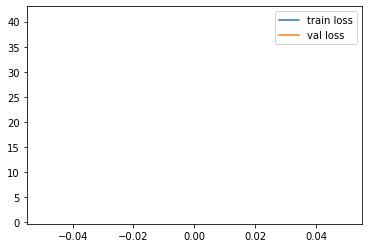

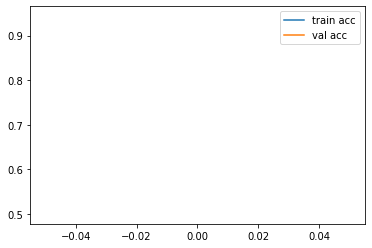

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet.h5')

In [21]:
y_pred = model.predict(test_set)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
img=image.load_img('C:\\data\\test\\cats\\cat.284.jpg',target_size=(224,224))


In [25]:
x=image.img_to_array(img)
x

array([[[ 59.,  61.,  58.],
        [ 78.,  80.,  77.],
        [ 80.,  82.,  79.],
        ...,
        [115., 123., 126.],
        [116., 124., 127.],
        [116., 124., 127.]],

       [[ 59.,  61.,  58.],
        [ 78.,  80.,  77.],
        [ 80.,  82.,  79.],
        ...,
        [115., 123., 126.],
        [116., 124., 127.],
        [116., 124., 127.]],

       [[ 74.,  76.,  73.],
        [ 85.,  87.,  84.],
        [ 80.,  82.,  79.],
        ...,
        [117., 125., 128.],
        [118., 126., 129.],
        [118., 126., 129.]],

       ...,

       [[ 41.,  46.,  50.],
        [ 72.,  77.,  80.],
        [ 21.,  30.,  25.],
        ...,
        [239.,  73.,  57.],
        [247.,  84.,  65.],
        [240.,  79.,  59.]],

       [[ 50.,  55.,  59.],
        [ 87.,  92.,  95.],
        [ 13.,  22.,  17.],
        ...,
        [253.,  81.,  67.],
        [255.,  96.,  79.],
        [254.,  89.,  70.]],

       [[ 50.,  55.,  59.],
        [ 87.,  92.,  95.],
        [ 13.,  

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=x/255

In [28]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

array([[1.00000e+00, 6.58639e-16]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

In [32]:
if a==0:
    print('cat')
else:
    print('dog')

cat
